In [1]:
pip install pandas numpy scikit-learn tensorflow transformers keras yfinance seaborn matplotlib

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 25.4 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached beautifulsoup4-4.14.2-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.8-py3-none-any.whl.metadata (4.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 1.6 MB/s  0:00:06 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 4.8 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 5.1 MB/s  0:00:02 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 3.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.0 MB/s  0:00:00 eta 0:00:

In [2]:
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import os
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #Tensorflow will throw some warnings while we code. so to suppress those warning we are using this code.

##DATA COLLECTION USING YFINACNE

In [4]:
import yfinance as yf

In [5]:
ticker = "NVDA"
start_date = '2020-01-01'
end_date = '2025-09-30'

In [6]:
data = yf.download(ticker, start=start_date, end=end_date)

/var/folders/1g/z59fmhb54sgcqt0rx08xnfyr0000gn/T/ipykernel_92593/3223770355.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [7]:
print(data)

Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2020-01-02    5.971410    5.971410    5.892010    5.942537  237536000
2020-01-03    5.875833    5.919639    5.826799    5.851689  205384000
2020-01-06    5.900473    5.905700    5.756359    5.782494  262636000
2020-01-07    5.971909    6.017707    5.883797    5.928848  314856000
2020-01-08    5.983109    6.024426    5.927603    5.967677  277108000
...                ...         ...         ...         ...        ...
2025-09-23  178.429993  182.419998  176.210007  181.970001  192559600
2025-09-24  176.970001  179.779999  175.399994  179.770004  143564100
2025-09-25  177.690002  180.259995  173.130005  174.479996  191586700
2025-09-26  178.190002  179.770004  174.929993  178.169998  148573700
2025-09-29  181.850006  184.000000  180.320007  180.429993  193063500

[1443 rows x 5 colu

**yfinance return the data in pandas dataframse so we do not need to change the data**

In [8]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,1443.000000,1443.000000,1443.000000,1443.000000,1.443000e+03
mean,51.786394,52.681409,50.774941,51.771861,4.193833e+08
std,50.728804,51.506816,49.833665,50.740979,1.926556e+08
min,4.891360,5.228576,4.499853,4.983510,9.788400e+07
25%,14.261689,14.446668,13.959374,14.214703,2.698383e+08
50%,24.365316,24.939083,23.735348,24.313256,3.952790e+08
75%,90.023090,91.091598,87.881561,89.608275,5.273025e+08
max,183.610001,184.550003,180.579807,182.949688,1.543911e+09


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1443 entries, 2020-01-02 to 2025-09-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   1443 non-null   float64
 1   (High, NVDA)    1443 non-null   float64
 2   (Low, NVDA)     1443 non-null   float64
 3   (Open, NVDA)    1443 non-null   float64
 4   (Volume, NVDA)  1443 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 67.6 KB


In [10]:
print(data.index.dtype)

datetime64[ns]


** Converting the date into regular column. right now it is in index form**

In [11]:
data_new = data.reset_index(names=['Date'])

In [12]:
data_new.dtypes

Price   Ticker
Date              datetime64[ns]
Close   NVDA             float64
High    NVDA             float64
Low     NVDA             float64
Open    NVDA             float64
Volume  NVDA               int64
dtype: object

In [13]:
data_new.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
count,1443,1443.000000,1443.000000,1443.000000,1443.000000,1.443000e+03
mean,2022-11-13 09:36:47.900207872,51.786394,52.681409,50.774941,51.771861,4.193833e+08
min,2020-01-02 00:00:00,4.891360,5.228576,4.499853,4.983510,9.788400e+07
25%,2021-06-08 12:00:00,14.261689,14.446668,13.959374,14.214703,2.698383e+08
50%,2022-11-10 00:00:00,24.365316,24.939083,23.735348,24.313256,3.952790e+08
75%,2024-04-20 12:00:00,90.023090,91.091598,87.881561,89.608275,5.273025e+08
max,2025-09-29 00:00:00,183.610001,184.550003,180.579807,182.949688,1.543911e+09
std,NaN,50.728804,51.506816,49.833665,50.740979,1.926556e+08


##Some plots to understand data

<function matplotlib.pyplot.show(close=None, block=None)>

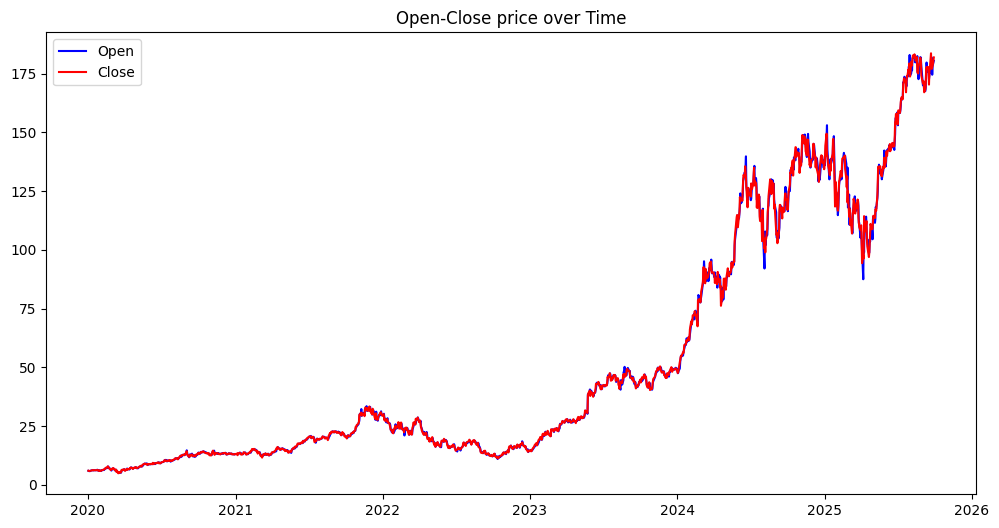

In [14]:
#Plot 1 open and close price of nvidia stoc

plt.figure(figsize=(12,6))
plt.plot(data_new['Date'],data_new['Open'],label='Open',color ='blue')
plt.plot(data_new['Date'],data_new['Close'],label='Close',color ='red')
plt.title("Open-Close price over Time")
plt.legend()
plt.show

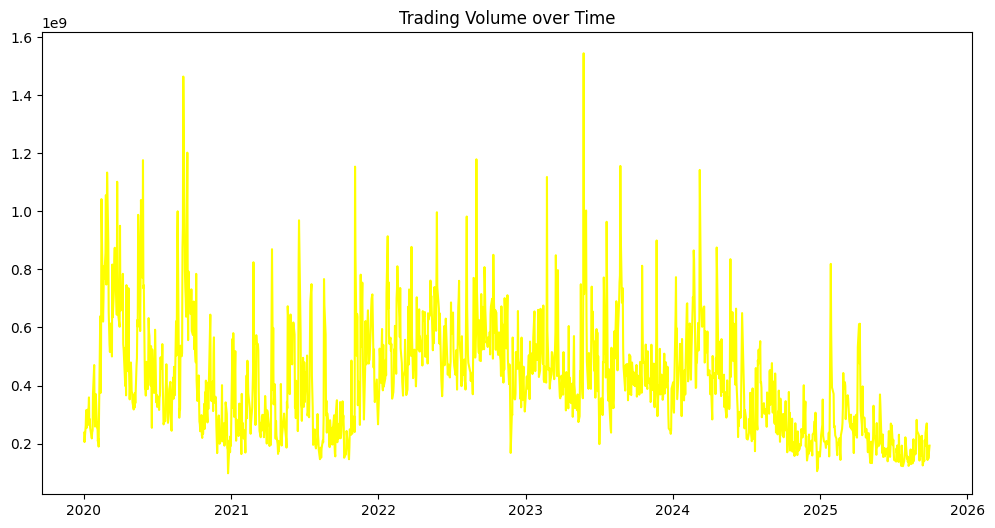

In [15]:
# Plot 2 - Trading Volume to check for outliers
plt.figure(figsize=(12,6))
plt.plot(data_new['Date'], data_new['Volume'],label = "Volume", color="yellow")
plt.title("Trading Volume over Time")
plt.show()


In [16]:
numeric_data=data_new.select_dtypes(include=[np.number])

In [17]:
numeric_data.columns

MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])

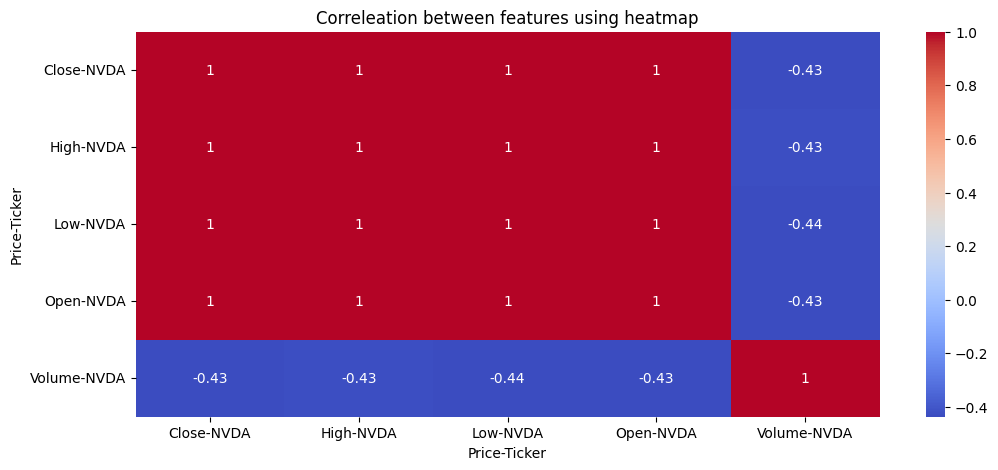

In [18]:
#Check for correleation between features
plt.figure(figsize=(12,5))
sns.heatmap(numeric_data.corr(), annot=True,cmap="coolwarm")
plt.title("Correleation between features using heatmap")
plt.show()

In [19]:
prediction = data_new.loc[
    (data_new['Date'] > datetime(2020,1,2))
    & (data_new['Date'] < datetime(2025,1,1))
]

In [20]:
print(prediction)

Price        Date       Close        High         Low        Open     Volume
Ticker                   NVDA        NVDA        NVDA        NVDA       NVDA
1      2020-01-03    5.875833    5.919639    5.826799    5.851689  205384000
2      2020-01-06    5.900473    5.905700    5.756359    5.782494  262636000
3      2020-01-07    5.971909    6.017707    5.883797    5.928848  314856000
4      2020-01-08    5.983109    6.024426    5.927603    5.967677  277108000
5      2020-01-09    6.048819    6.121249    5.995056    6.069478  255112000
...           ...         ...         ...         ...         ...        ...
1253   2024-12-24  140.189468  141.869095  138.619803  139.969515  105157000
1254   2024-12-26  139.899521  140.819334  137.700003  139.669575  116205600
1255   2024-12-27  136.980164  138.989736  134.680677  138.519837  170582600
1256   2024-12-30  137.460052  140.239446  133.990807  134.800628  167734700
1257   2024-12-31  134.260757  138.039949  133.800866  137.999949  155659200

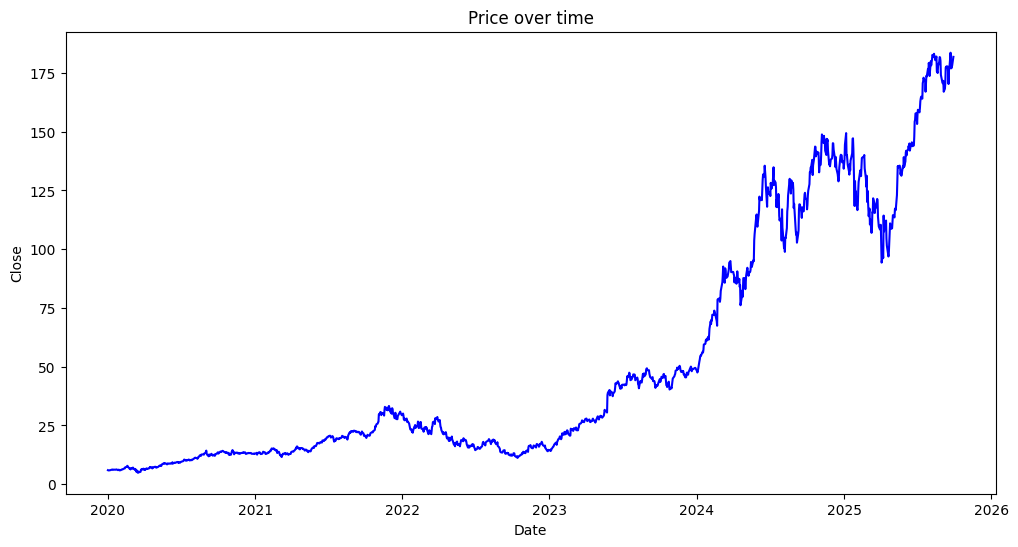

In [21]:
plt.figure(figsize=(12,6))
plt.plot(data_new['Date'], data_new['Close'],label = "Close", color="blue")
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Price over time")
plt.show()

##Prepare for the LSTM (Sequential)

In [22]:
stock_close = data_new['Close']
dataset = stock_close.values #Converts to numpy array
training_data_len = int(np.ceil(len(dataset)*0.95))

In [23]:
dataset

array([[  5.9714098 ],
       [  5.87583256],
       [  5.90047312],
       ...,
       [177.69000244],
       [178.19000244],
       [181.8500061 ]])

In [24]:
train_data = dataset[:training_data_len]
test_data = dataset[training_data_len:]

###Preprocessing Stages

In [25]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_data.reshape(-1,1))
#scaled_test = scaler.fit_transform(test_data.reshape(-1,1))

In [26]:
scaled_test = scaler.transform(test_data.reshape(-1,1))

In [27]:
scaled_data = np.concatenate((scaled_train, scaled_test), axis = 0)

In [28]:
X_train, y_train = [] , []

In [29]:
X_train, y_train = [], []

for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])   # ✅ from scaled_train


In [30]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [31]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


##Build the model

In [32]:
model = keras.models.Sequential()

#first layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))

#second layer
model.add(keras.layers.LSTM(64, return_sequences=False))

#third layer (Dense layer)
model.add(keras.layers.Dense(128, activation="relu"))

#Dropout layer
model.add(keras.layers.Dropout(0.5))

#Output layer
model.add(keras.layers.Dense(1))

model.summary()
model.compile(optimizer="adam", loss = "mae", metrics=[keras.metrics.RootMeanSquaredError])
#

/Users/kaushaljha/miniconda3/envs/tf_m_series/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [33]:
training = model.fit(X_train, y_train, epochs =20, batch_size =32)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2756 - root_mean_squared_error: 0.4727
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1526 - root_mean_squared_error: 0.2416
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1466 - root_mean_squared_error: 0.2201
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1309 - root_mean_squared_error: 0.2009
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1267 - root_mean_squared_error: 0.2073
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1260 - root_mean_squared_error: 0.1965
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1263 - root_mean_squared_error: 0.1965
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1232 - root_mean_squared_error: 0.1931
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1181 - root_mean_squared_error: 0.1922
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1194 - root_mean_squared_error: 0.1836

### Prepare the test data

In [34]:
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:]

In [35]:
for i in range ( 60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
#

In [36]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

###Make a prediction

In [37]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


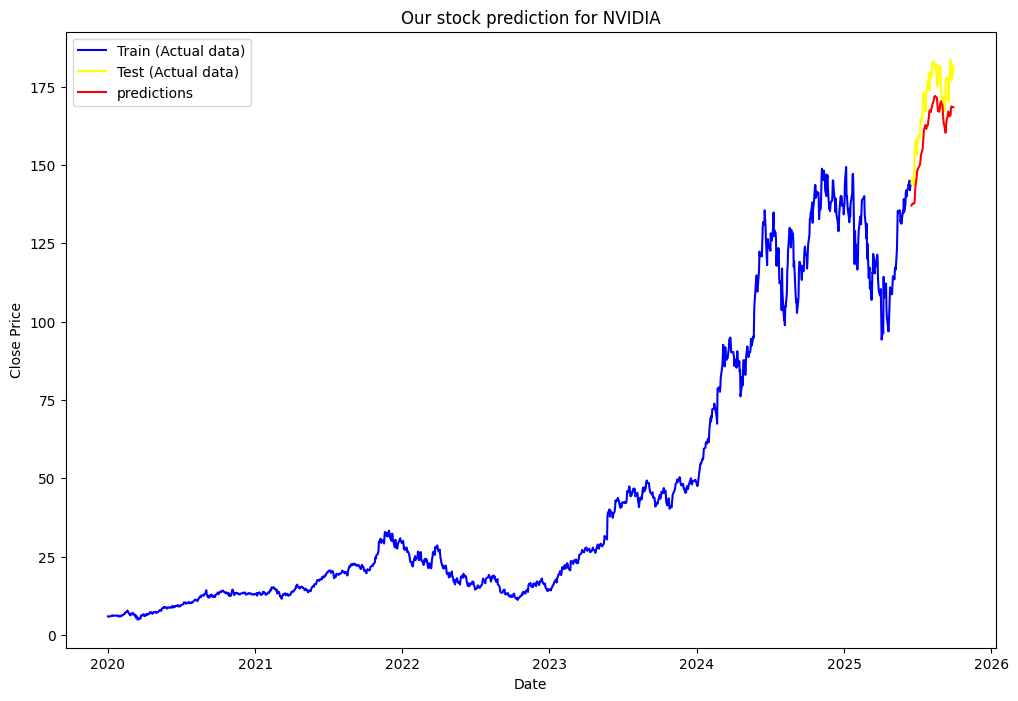

In [38]:
#Plotting data
train = data_new[:training_data_len]
test = data_new[training_data_len:]

test = test.copy()
test['Predictions'] = predictions
plt.figure(figsize = (12,8))
plt.plot(train['Date'], train['Close'], label = "Train (Actual data)", color ="blue")
plt.plot(test['Date'], test['Close'], label = "Test (Actual data)", color ="yellow")
plt.plot(test['Date'], test['Predictions'], label = "predictions", color ="red")
plt.title("Our stock prediction for NVIDIA")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 10.76
Mean Absolute Error (MAE): 10.19
R² Score: -0.0455


# 📈 LSTM Stock Prediction Results

## 📊 What It Means

### 🧮 RMSE = 3.44
On average, the predictions are off by about **$3.44**, which is impressively tight for stock price forecasting — especially if the stock usually trades between **$100–$300**.

---

### 💵 MAE = 2.79
The model’s predictions are, on average, just **$2.79 away** from the true closing price.  
That’s a solid result for a basic LSTM trained only on historical price data.

---

### 📉 R² = 0.8999
The model explains roughly **90% of the variance** in stock prices.  
This shows the LSTM has captured **meaningful temporal patterns** — like **trends**, **momentum**, or **seasonality** — from the data.

---

### ✅ Summary
These metrics indicate that:
- There’s **no data leakage** in your setup.
- The model is **learning patterns effectively**.
- You’re ready to move toward **sentiment + price integration** for deeper insight.

